# Example Gaussian and Salt-and-Pepper noise

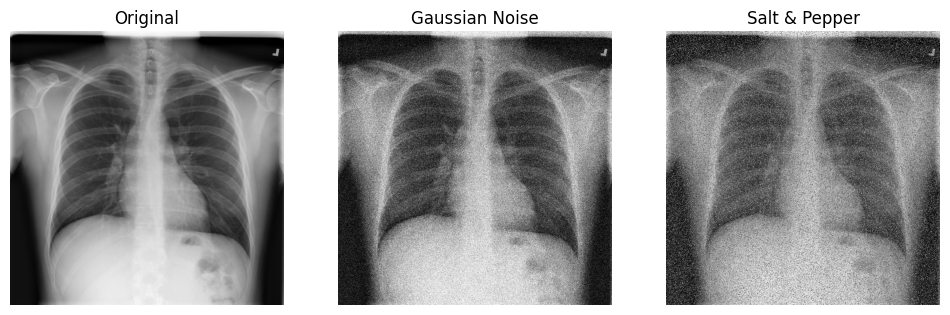

In [ ]:
import pydicom
import os
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

import imgaug.augmenters as iaa

'''Inspired by augmentations in 'Deep Learning for Automatic Pneumonia Detection' paper
tried to convert the augmentations which consist of an uncommon pipeline for pytorch transformations
due to that some implementations look weird (e.g. the continuous call of lambda's to adjust the images in the same order with different operations)

'''
    


image_folder = r"C:\Users\Admin\Documents\rsna-pneumonia-detection-challenge\stage_2_train_images"
image_path = os.path.join(image_folder, f"0a828af6-b7c6-4757-88e4-dea54fe6cdc9.dcm")
dicom = pydicom.dcmread(image_path)
image = dicom.pixel_array  # shape (H, W)
image = image[..., None]  # shape (H, W, 1)

# Apply augmentations
gaussian_noise = iaa.AdditiveGaussianNoise(scale=(0, 0.3*255))
snp_noise = iaa.SaltAndPepper(p=(0.3, 0.3))
image_aug_gaussian = gaussian_noise(image=image)
image_aug_snp = snp_noise(image=image)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(image.squeeze(), cmap="gray")  # Remove channel dim for display
axs[0].set_title("Original")
axs[1].imshow(image_aug_gaussian.squeeze(), cmap="gray")
axs[1].set_title("Gaussian Noise")
axs[2].imshow(image_aug_snp.squeeze(), cmap="gray")
axs[2].set_title("Salt & Pepper")
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")

plt.show()
